<a href="https://colab.research.google.com/github/un1qqe/Brain-Tumor-Classification/blob/main/brain__tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-02-22 19:01:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-22 19:01:49 (114 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from helper_functions import unzip_data,walk_through_dir

In [3]:
pip install kaggle

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!kaggle datasets download -d un1qqee/brain-tumor-dataset

100% 64.0M/64.2M [00:04<00:00, 20.5MB/s]
100% 64.2M/64.2M [00:04<00:00, 14.3MB/s]


In [7]:
unzip_data('/content/brain-tumor-dataset.zip')

In [10]:

test_dir='/content/tumordataset/test'
train_dir='/content/tumordataset/train'
pred_dir='/content/tumordataset/pred'

In [12]:
walk_through_dir(test_dir)

There are 2 directories and 0 images in '/content/tumordataset/test'.
There are 0 directories and 499 images in '/content/tumordataset/test/yes'.
There are 0 directories and 499 images in '/content/tumordataset/test/no'.


In [13]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import os
import random

In [14]:
def view_img(filepath):
  random_img=random.choice(os.listdir(filepath))
  img=plt.imread(filepath+'/'+random_img)
  view=plt.imshow(img)
  plt.axis(False)
  return view,img.shape

(<matplotlib.image.AxesImage at 0x7c7ce198e4d0>, (449, 359, 3))

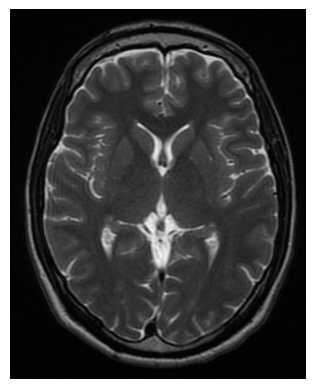

In [15]:
view_img(pred_dir)

In [9]:

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=15,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              brightness_range=[0.5, 1.5],
                              horizontal_flip=True,
                              vertical_flip=True,)

train_generator = datagen.flow_from_directory(
    '/content/tumordataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 2002 images belonging to 2 classes.


In [10]:
test_generator=datagen.flow_from_directory(
    '/content/tumordataset/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 998 images belonging to 2 classes.


In [11]:
def preprocess(filepath):
  images=[]
  for img_name in os.listdir(filepath):
    img_path=os.path.join(filepath,img_name)
    img=tf.io.read_file(img_path)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,(224,224))
    img=tf.cast(img,tf.float32)/255.0
    images.append(img)
  return tf.convert_to_tensor(images)

In [12]:
pred_data=preprocess(pred_dir)


In [13]:

class_indices = train_generator.class_indices
print(class_indices)

{'no': 0, 'yes': 1}


In [14]:
len(train_generator)

63

In [15]:
train_data=tf.data.Dataset.from_generator(lambda:train_generator,
                                          output_signature=(
    tf.TensorSpec(shape=(None,224,224,3),dtype=tf.float32),
    tf.TensorSpec(shape=(None,),dtype=tf.float32)
    ))
test_data=tf.data.Dataset.from_generator(lambda:test_generator,
                                         output_signature=(
                                             tf.TensorSpec(shape=(None,224,224,3),dtype=tf.float32),
                                             tf.TensorSpec(shape=(None,),dtype=tf.float32)
                                         ))
train_data=train_data.prefetch(tf.data.AUTOTUNE)
test_data=test_data.prefetch(tf.data.AUTOTUNE)

In [16]:
pred_data_dataset=tf.data.Dataset.from_tensor_slices(pred_data)

In [17]:
pred_data_dataset=pred_data_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
pred_data

<tf.Tensor: shape=(60, 224, 224, 3), dtype=float32, numpy=
array([[[[1.0980392e-01, 1.0980392e-01, 1.0980392e-01],
         [1.1330532e-01, 1.1330532e-01, 1.1330532e-01],
         [2.0308124e-02, 2.0308124e-02, 2.0308124e-02],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[1.0980392e-01, 1.0980392e-01, 1.0980392e-01],
         [1.1330532e-01, 1.1330532e-01, 1.1330532e-01],
         [2.0308124e-02, 2.0308124e-02, 2.0308124e-02],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[1.0980392e-01, 1.0980392e-01, 1.0980392e-01],
         [1.1330532e-01, 1.1330532e-01, 1.1330532e-01],
         [2.0308124e-02, 2.0308124e-02, 2.0308124e-02],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [20]:
from keras import layers

In [21]:
def vgg16(input_shape=(224, 224, 3), num_classes=1):
  input_tensor=layers.Input(shape=input_shape,dtype=tf.float32)

  #Block 1
  x=Conv2D(64,(3,3),activation='relu',padding='same')(input_tensor)
  x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
  x=MaxPooling2D((2,2),strides=(2,2))(x)

  #Block 2

  x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
  x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
  x=MaxPooling2D((2,2),strides=(2,2))(x)

  #Block 3

  x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
  x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
  x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
  x=MaxPooling2D((2,2),strides=(2,2))(x)

  #Block 4

  x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
  x=MaxPooling2D((2,2),strides=(2,2))(x)

  #Block 5

  x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
  x=MaxPooling2D((2,2),strides=(2,2))(x)

  #Fully connected layers
  x=Flatten()(x)
  x=Dense(4096,activation='relu')(x)
  x=Dropout(0.5)(x)
  x=Dense(4096,activation='relu')(x)
  x=Dropout(0.5)(x)
  output=Dense(num_classes,activation='sigmoid')(x)
  model=tf.keras.models.Model(inputs=input_tensor,outputs=output)
  return model

In [22]:
vgg_model=vgg16()

In [23]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

In [24]:
vgg_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['accuracy'])
vgg_model_history=vgg_model.fit(train_generator,epochs=100,validation_data=test_generator,callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=20),
    tf.keras.callbacks.ReduceLROnPlateau(patience=10)
])

Epoch 1/100
63/63 [==============================] - 78s 842ms/step - loss: 0.6947 - accuracy: 0.5045 - val_loss: 0.6926 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
63/63 [==============================] - 40s 629ms/step - loss: 0.6936 - accuracy: 0.5485 - val_loss: 0.6842 - val_accuracy: 0.5992 - lr: 1.0000e-04
Epoch 3/100
63/63 [==============================] - 41s 647ms/step - loss: 0.6610 - accuracy: 0.6374 - val_loss: 0.7283 - val_accuracy: 0.5160 - lr: 1.0000e-04
Epoch 4/100
63/63 [==============================] - 40s 637ms/step - loss: 0.6052 - accuracy: 0.6743 - val_loss: 0.5947 - val_accuracy: 0.7014 - lr: 1.0000e-04
Epoch 5/100
63/63 [==============================] - 41s 647ms/step - loss: 0.5760 - accuracy: 0.7093 - val_loss: 0.5844 - val_accuracy: 0.7164 - lr: 1.0000e-04
Epoch 6/100
63/63 [==============================] - 41s 640ms/step - loss: 0.5579 - accuracy: 0.7218 - val_loss: 0.6916 - val_accuracy: 0.6623 - lr: 1.0000e-04
Epoch 7/100
63/63 [===============

In [27]:
preds=vgg_model.predict(pred_data)

2/2 [==============================] - 7s 6s/step


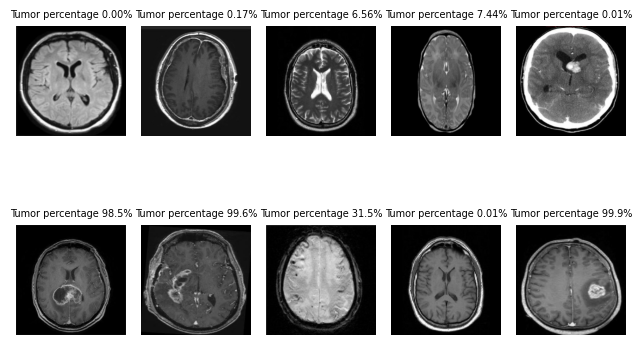

In [75]:
preds=tf.constant(preds)
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.axis(False)
  img=plt.imshow(pred_data[i])
  pred_formatted=preds.numpy()
  pred_formatted=pred_formatted[i]
  img=plt.title(f'Tumor percentage {str(pred_formatted*100)[1:5]}%', fontsize=7)
plt.tight_layout()
plt.show()